<a href="https://colab.research.google.com/github/amitgupta005/Asi_2023/blob/main/Income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/csv files/final/income(1).csv")
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
data.columns.tolist()

['age',
 'JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'nativecountry',
 'SalStat']

# **Data Preprocessing**

In [ ]:
inc = data.copy()

In [ ]:
inc.shape

(31978, 13)

In [ ]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
unique_values = {}
for col in inc.columns:
  unique_values[col] = inc[col].unique()

# Print the unique values for each column
for col, values in unique_values.items():
  print(f"Unique values for column '{col}': {values}")


Unique values for column 'age': [45 24 44 27 20 51 17 19 60 40 30 38 23 32 54 50 37 52 49 22 35 67 46 33
 43 28 41 25 63 59 34 26 72 62 58 47 39 53 57 21 42 74 36 29 31 69 18 65
 55 48 71 70 66 56 61 68 64 73 81 78 76 90 88 75 77 80 82 79 83 84 85 86
 87]
Unique values for column 'JobType': [' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']
Unique values for column 'EdType': [' HS-grad' ' Some-college' ' 9th' ' 11th' ' Assoc-voc' ' Assoc-acdm'
 ' Bachelors' ' 1st-4th' ' Masters' ' 10th' ' 12th' ' 5th-6th'
 ' Prof-school' ' Doctorate' ' 7th-8th' ' Preschool']
Unique values for column 'maritalstatus': [' Divorced' ' Never-married' ' Married-civ-spouse' ' Widowed'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse']
Unique values for column 'occupation': [' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-f

In [ ]:
inc.replace(" ?", np.nan, inplace = True)

In [ ]:
inc.nunique()

age               73
JobType            8
EdType            16
maritalstatus      7
occupation        14
relationship       6
race               5
gender             2
capitalgain      119
capitalloss       92
hoursperweek      94
nativecountry     41
SalStat            2
dtype: int64

In [ ]:
inc.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [ ]:
def education_group(EdType):
    if EdType.strip() in ['9th', '10th','Preschool','1st-4th','7th-8th']:
        return 'Less than 10th'
    elif EdType.strip() in ['11th', '12th', 'HS-grad']:
        return 'Less than 12th'
    elif EdType.strip() in ['Bachelors',  'Some-college']:
        return 'Bachelors'
    elif EdType.strip() == 'Masters':
        return 'Masters'
    elif EdType.strip() in ['Prof-school', 'Doctorate']:
        return 'Doctorate'
    else:
        return 'Others'


In [ ]:
# Apply the function to create a new column 'EdGroup'
inc['EdGroup'] = inc['EdType'].apply(education_group)

# Display the result
print(inc[['EdType', 'EdGroup']])

              EdType         EdGroup
0            HS-grad  Less than 12th
1            HS-grad  Less than 12th
2       Some-college       Bachelors
3                9th  Less than 10th
4       Some-college       Bachelors
...              ...             ...
31973        HS-grad  Less than 12th
31974   Some-college       Bachelors
31975   Some-college       Bachelors
31976   Some-college       Bachelors
31977      Bachelors       Bachelors

[31978 rows x 2 columns]


In [ ]:
inc['EdGroup'].value_counts()

Bachelors         12397
Less than 12th    11952
Others             2739
Less than 10th     2267
Masters            1674
Doctorate           949
Name: EdGroup, dtype: int64

In [ ]:
inc['EdType'].value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64

In [ ]:
inc['maritalstatus'].value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

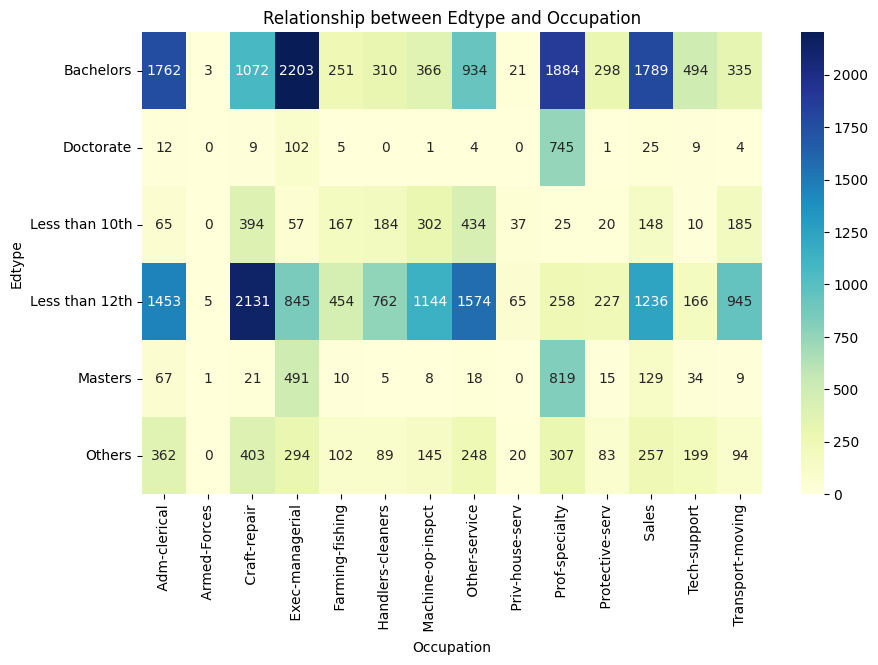

In [ ]:
cross_tab = pd.crosstab(inc['EdGroup'], inc['occupation'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='g')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Edtype')
plt.title('Relationship between Edtype and Occupation')

# Show the plot
plt.show()

In [ ]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(cross_tab)
p

NameError: name 'chi2_contingency' is not defined

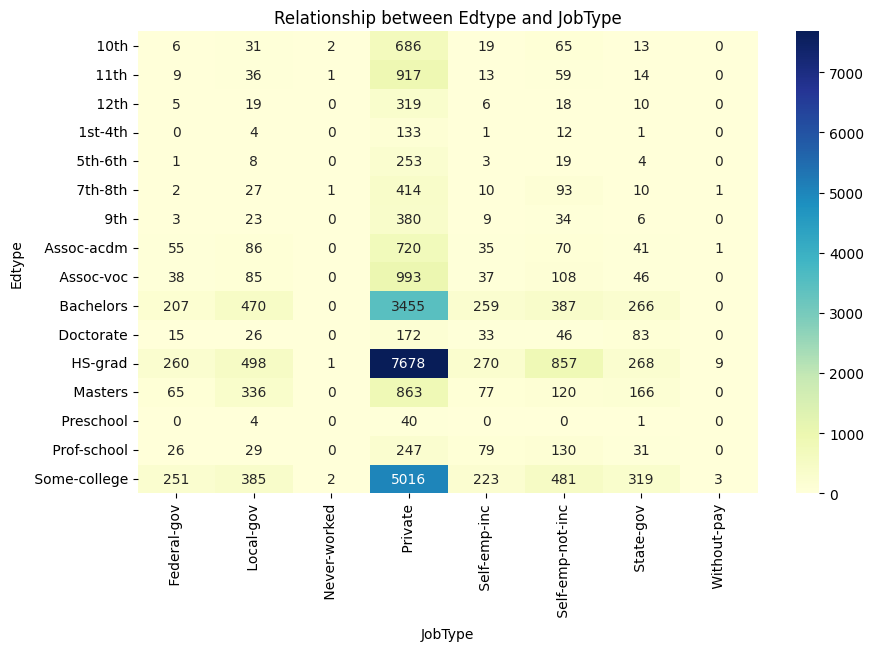

In [ ]:
cross_tab = pd.crosstab(inc['EdType'], inc['JobType'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='g')

# Add labels and title
plt.xlabel('JobType')
plt.ylabel('Edtype')
plt.title('Relationship between Edtype and JobType')

# Show the plot
plt.show()

In [ ]:
result = inc.groupby('EdType').agg(
    Null_Count_occupation=('occupation', lambda x: x.isnull().sum()),
    Total_Count=('occupation', 'count')
).reset_index()

# Display the result
print(result)

           EdType  Null_Count_occupation  Total_Count
0            10th                    101          820
1            11th                    119         1048
2            12th                     40          377
3         1st-4th                     12          151
4         5th-6th                     30          288
5         7th-8th                     70          557
6             9th                     51          455
7      Assoc-acdm                     47         1008
8       Assoc-voc                     59         1307
9       Bachelors                    166         5044
10      Doctorate                     15          375
11        HS-grad                    528         9840
12        Masters                     47         1627
13      Preschool                      5           45
14    Prof-school                     17          542
15   Some-college                    509         6678


In [ ]:
result = inc.groupby('EdGroup').agg(
    Null_Count_occupation=('JobType', lambda x: x.isnull().sum()),
    Total_Count=('JobType', 'count')
).reset_index()

# Display the result
print(result)

          EdGroup  Null_Count_occupation  Total_Count
0       Bachelors                      0        12397
1       Doctorate                      0          949
2  Less than 10th                      0         2267
3  Less than 12th                      0        11952
4         Masters                      0         1674
5          Others                      0         2739


In [ ]:
# Function to fill null values based on the ratio of categories
def fill_null_values(series):
    null_indices = series[series.isnull()].index
    non_null_values = series.dropna().values
    fill_values = np.random.choice(non_null_values, size=len(null_indices))
    series.loc[null_indices] = fill_values
    return series

In [ ]:
# Group by 'EdType' and apply the fill_null_values function
inc['occupation'] = inc.groupby('EdType')['occupation'].transform(fill_null_values)

# Group by 'EdType' and apply the fill_null_values function
inc['JobType'] = inc.groupby('EdType')['JobType'].transform(fill_null_values)

In [ ]:
max(inc['age'])

90

In [ ]:
min(inc['age'])

17

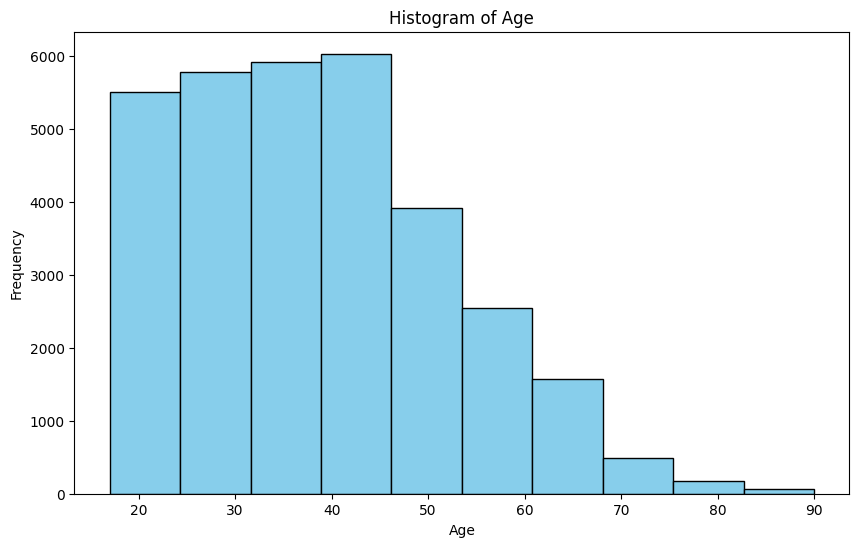

In [ ]:
# Draw histogram for 'age'
plt.figure(figsize=(10, 6))
plt.hist(inc['age'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show the plot
plt.show()

In [ ]:
# # Define the number of bins
# num_bins = 6

# # Create a new column 'AgeGroup' with uniform binning
# inc['AgeGroup'] = pd.cut(inc['age'], bins=num_bins, precision=0)

In [ ]:
# inc['AgeGroup'].value_counts()

In [ ]:
# import matplotlib.pyplot as plt
# # Draw countplot for 'AgeGroup'
# plt.figure(figsize=(10, 6))
# sns.countplot(x='AgeGroup', data=inc, palette='viridis')

# # Add labels and title
# plt.xlabel('Age Group')
# plt.ylabel('Count')
# plt.title('Countplot of Age Groups')

# # Show the plot
# plt.show()

In [ ]:
# inc.drop(['age'], inplace = True, axis = 1)

In [ ]:
inc.drop_duplicates(keep='first',inplace=True)
inc.shape

(28529, 14)

In [ ]:
inc['SalStat'] = inc['SalStat'].replace({' greater than 50,000': 1, ' less than or equal to 50,000': 0})

In [ ]:
inc.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat,EdGroup
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0,Less than 12th
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0,Less than 12th
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1,Bachelors
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0,Less than 10th
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0,Bachelors


In [ ]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28529 entries, 0 to 31976
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            28529 non-null  int64 
 1   JobType        28529 non-null  object
 2   EdType         28529 non-null  object
 3   maritalstatus  28529 non-null  object
 4   occupation     28529 non-null  object
 5   relationship   28529 non-null  object
 6   race           28529 non-null  object
 7   gender         28529 non-null  object
 8   capitalgain    28529 non-null  int64 
 9   capitalloss    28529 non-null  int64 
 10  hoursperweek   28529 non-null  int64 
 11  nativecountry  28529 non-null  object
 12  SalStat        28529 non-null  int64 
 13  EdGroup        28529 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


<ipython-input-41-99963e49032e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")


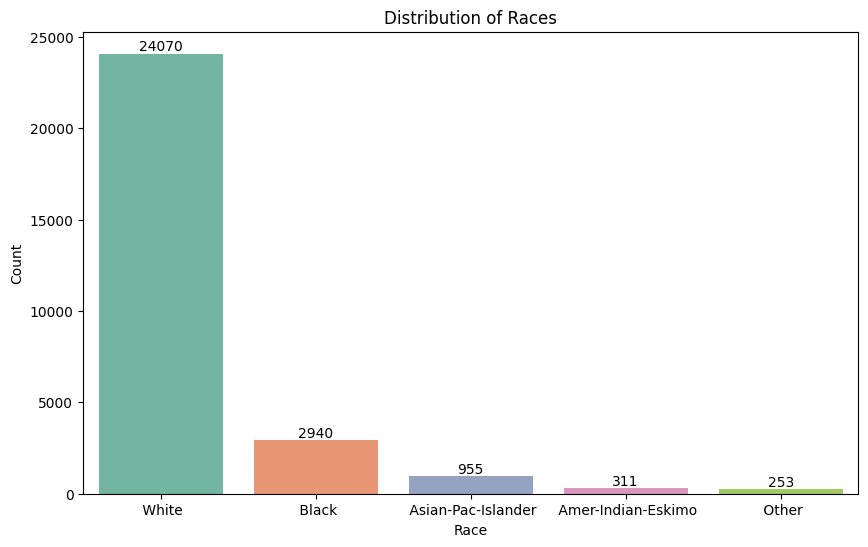

In [ ]:
race_counts = inc["race"].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")

# Add labels and title
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of Races")

# Display count values on top of each bar
for index, value in enumerate(race_counts):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# Replace values other than " White" with " Non-White" in the 'race' column
inc['race'] = np.where(inc['race'] == ' White', 'White', 'Non-White')

<ipython-input-43-99963e49032e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")


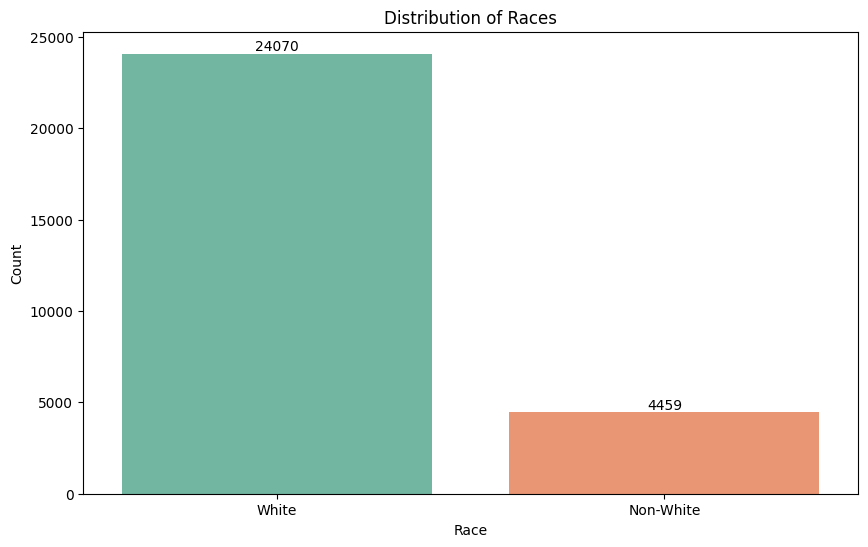

In [ ]:
race_counts = inc["race"].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set2")

# Add labels and title
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of Races")

# Display count values on top of each bar
for index, value in enumerate(race_counts):
    barplot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

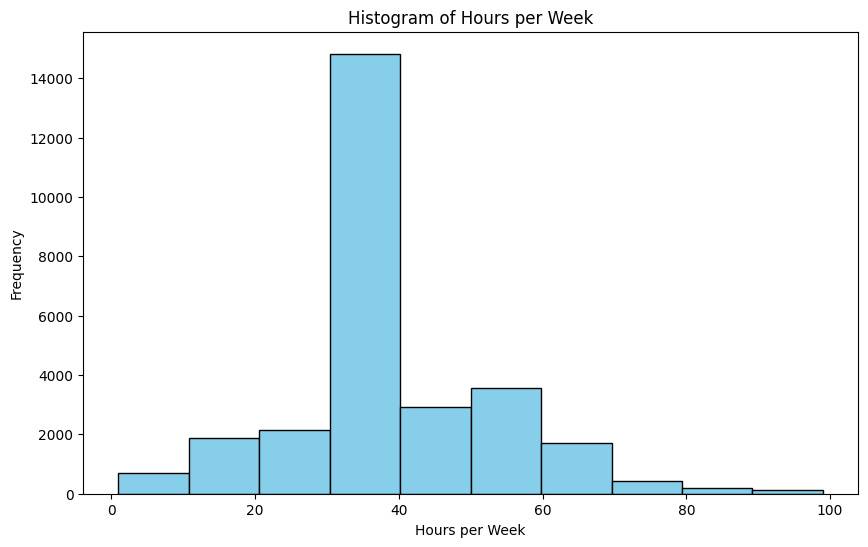

In [ ]:
# Draw histogram for 'hours-per-week'
plt.figure(figsize=(10, 6))
plt.hist(inc['hoursperweek'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours per Week')

# Show the plot
plt.show()

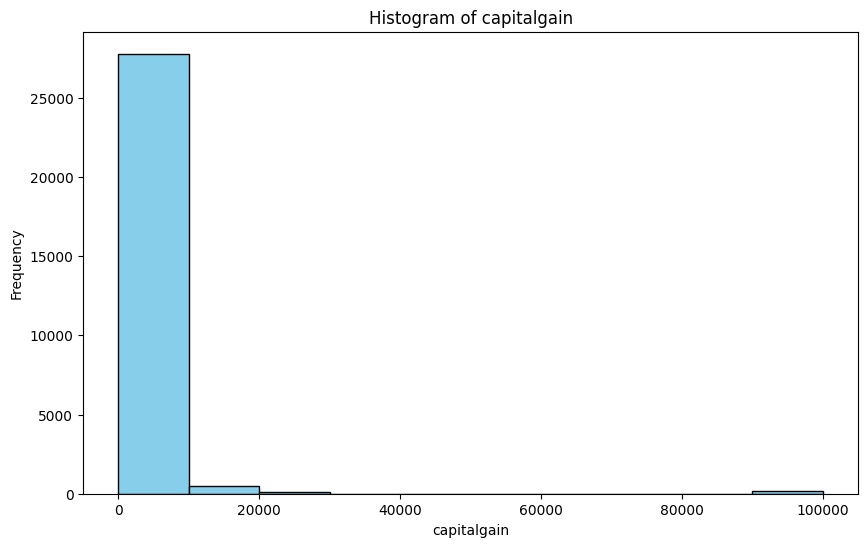

In [ ]:
# Histogram of capitalgain
plt.figure(figsize=(10, 6))
plt.hist(inc['capitalgain'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('capitalgain')
plt.ylabel('Frequency')
plt.title('Histogram of capitalgain')

# Show the plot
plt.show()

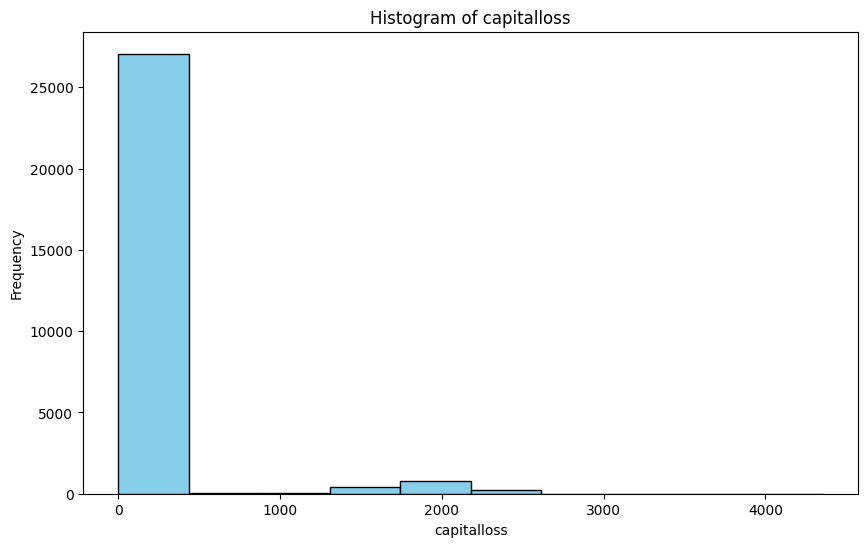

In [ ]:
# Histogram of capitalloss
plt.figure(figsize=(10, 6))
plt.hist(inc['capitalloss'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('capitalloss')
plt.ylabel('Frequency')
plt.title('Histogram of capitalloss')

# Show the plot
plt.show()

In [ ]:
inc.drop(columns = ['capitalgain','capitalloss'], inplace = True)

In [ ]:
inc.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,hoursperweek,nativecountry,SalStat,EdGroup
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,28,United-States,0,Less than 12th
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,40,United-States,0,Less than 12th
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,40,United-States,1,Bachelors
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,40,Mexico,0,Less than 10th
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,35,United-States,0,Bachelors


In [ ]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28529 entries, 0 to 31976
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            28529 non-null  int64 
 1   JobType        28529 non-null  object
 2   EdType         28529 non-null  object
 3   maritalstatus  28529 non-null  object
 4   occupation     28529 non-null  object
 5   relationship   28529 non-null  object
 6   race           28529 non-null  object
 7   gender         28529 non-null  object
 8   hoursperweek   28529 non-null  int64 
 9   nativecountry  28529 non-null  object
 10  SalStat        28529 non-null  int64 
 11  EdGroup        28529 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.8+ MB


In [ ]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28529 entries, 0 to 31976
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            28529 non-null  int64 
 1   JobType        28529 non-null  object
 2   EdType         28529 non-null  object
 3   maritalstatus  28529 non-null  object
 4   occupation     28529 non-null  object
 5   relationship   28529 non-null  object
 6   race           28529 non-null  object
 7   gender         28529 non-null  object
 8   hoursperweek   28529 non-null  int64 
 9   nativecountry  28529 non-null  object
 10  SalStat        28529 non-null  int64 
 11  EdGroup        28529 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.8+ MB


In [ ]:
unique_values = {}
for column in inc.columns:
    unique_values[column] = inc[column].nunique()

# Create a DataFrame from the dictionary
unique_counts_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values Count'])

# Print the resulting DataFrame
print(unique_counts_df)

           Column  Unique Values Count
0             age                   73
1         JobType                    8
2          EdType                   16
3   maritalstatus                    7
4      occupation                   14
5    relationship                    6
6            race                    2
7          gender                    2
8    hoursperweek                   94
9   nativecountry                   41
10        SalStat                    2
11        EdGroup                    6


In [ ]:
inc['nativecountry'].unique()

array([' United-States', ' Mexico', ' Portugal', ' El-Salvador',
       ' Poland', ' France', ' Puerto-Rico', ' Canada', ' Cuba',
       ' Taiwan', ' Philippines', ' South', ' Dominican-Republic',
       ' Jamaica', ' Honduras', ' Haiti', ' Germany', ' Guatemala',
       ' England', ' Italy', ' China', ' India', ' Japan', ' Yugoslavia',
       ' Iran', ' Thailand', ' Peru', ' Outlying-US(Guam-USVI-etc)',
       ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua',
       ' Cambodia', ' Vietnam', ' Hong', ' Columbia', ' Ireland',
       ' Ecuador', ' Laos', ' Hungary', ' Holand-Netherlands'],
      dtype=object)

In [ ]:
inc['nativecountry'].value_counts()

 United-States                 25734
 Mexico                          633
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
inc['SalStat'].value_counts()

0    21474
1     7055
Name: SalStat, dtype: int64

In [ ]:
inc['gender'].value_counts()

 Male      18833
 Female     9696
Name: gender, dtype: int64

# **Model Fitting**

In [ ]:
inc2 = pd.get_dummies(inc, drop_first=True)

In [ ]:
inc2.shape

(28529, 96)

In [ ]:
X = inc2.drop("SalStat", axis = 1)

In [ ]:
y = inc2['SalStat'].values

In [ ]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
# Make an instance of the Model
logistic = LogisticRegression(solver='lbfgs', max_iter=27000)

# Fitting the values for x and y
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=27000)

In [ ]:
# Prediction from test data
y_pred = logistic.predict(X_test)

In [ ]:
# Calculating the accuracy
accuracy_score2=accuracy_score(y_test, y_pred)
print(accuracy_score2)

0.8273162752658021


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6440
           1       0.68      0.56      0.62      2119

    accuracy                           0.83      8559
   macro avg       0.77      0.74      0.75      8559
weighted avg       0.82      0.83      0.82      8559



In [ ]:
# Define the scoring metrics you want to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),  # Change 'weighted' as needed
    'recall': make_scorer(recall_score, average='weighted'),  # Change 'weighted' as needed
    'f1': make_scorer(f1_score, average='weighted')  # Change 'weighted' as needed
}

In [ ]:
# Define the number of folds for cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed

# Perform cross-validation and print the results
for metric, scorer in scoring_metrics.items():
    scores = cross_val_score(logistic, X, y, cv=cv, scoring=scorer)
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()}")
    print()

Accuracy scores: [0.83245706 0.81563267 0.82527164 0.82947774 0.83610868]
Mean accuracy: 0.8277895586637435

Precision scores: [0.8248588  0.80644381 0.8165456  0.8216244  0.82851308]
Mean precision: 0.8195971375740358

Recall scores: [0.83245706 0.81563267 0.82527164 0.82947774 0.83610868]
Mean recall: 0.8277895586637435

F1 scores: [0.82679428 0.80850129 0.81872904 0.82332896 0.82974232]
Mean f1: 0.8214191776199874



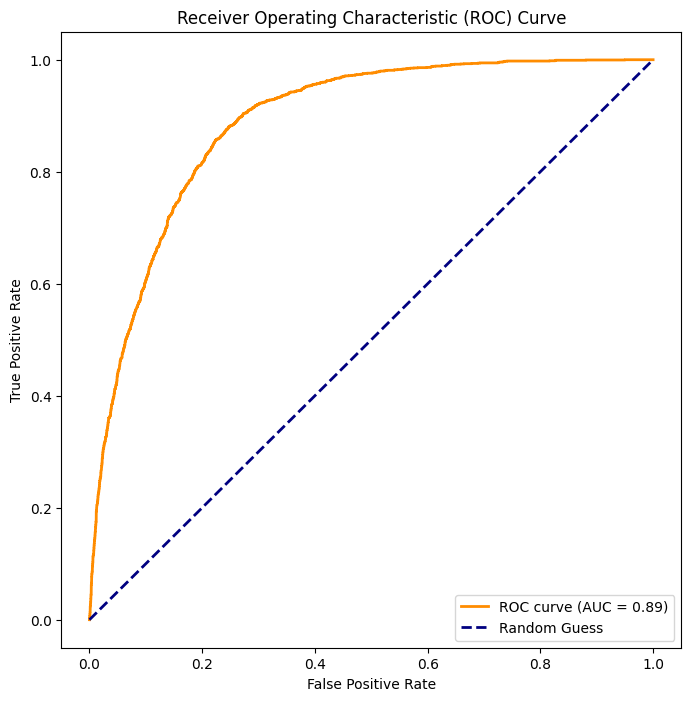

AUC Score: 0.8879


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Predict probabilities for the positive class (class 1)
y_prob = logistic.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

# Print AUC score
print(f'AUC Score: {roc_auc:.4f}')

In [ ]:
# Find threshold probability for a specific point on the ROC curve (e.g., FPR=0.1)
desired_fpr = 0.1
desired_threshold = thresholds[np.argmax(fpr >= desired_fpr)]
print(f'Threshold Probability at FPR={desired_fpr}: {desired_threshold:.4f}')

Threshold Probability at FPR=0.1: 0.4613


In [ ]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 100
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


In [ ]:
# Assume that fpr, tpr, thresholds have already been calculated
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.22985425761062198


In [ ]:
# Make predictions with the new threshold
y_pred_new_threshold = (y_prob >= 0.30).astype(int)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_new_threshold))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6440
           1       0.58      0.81      0.67      2119

    accuracy                           0.81      8559
   macro avg       0.75      0.81      0.77      8559
weighted avg       0.84      0.81      0.82      8559



# **Additional Data Preprocessing**

In [ ]:
# Drop the 'nativecountry' column
inc = inc.drop(columns=['nativecountry'])

In [ ]:
inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28529 entries, 0 to 31976
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            28529 non-null  int64 
 1   JobType        28529 non-null  object
 2   EdType         28529 non-null  object
 3   maritalstatus  28529 non-null  object
 4   occupation     28529 non-null  object
 5   relationship   28529 non-null  object
 6   race           28529 non-null  object
 7   gender         28529 non-null  object
 8   hoursperweek   28529 non-null  int64 
 9   SalStat        28529 non-null  int64 
 10  EdGroup        28529 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.6+ MB


In [ ]:
con_data = [feature for feature in inc.columns if inc[feature].dtype == "object" or inc[feature].dtype == "category"]
con_data

['JobType',
 'EdType',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'gender',
 'EdGroup']

In [ ]:
from scipy.stats import chi2_contingency

# Create an empty DataFrame to store the results
independence_results = pd.DataFrame(columns=['Feature', 'Chi-squared', 'p-value'])

# Iterate through each categorical column
for column in con_data:
    # Create a contingency table
    contingency_table = pd.crosstab(inc[column], inc['SalStat'])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Store the results in the DataFrame
    independence_results = independence_results.append({'Feature': column, 'Chi-squared': chi2, 'p-value': p}, ignore_index=True)

# Sort the results by p-value (smaller p-value means more significant)
independence_results.sort_values(by='p-value', ascending=True, inplace=True)

# Print or analyze the results
print(independence_results)


         Feature  Chi-squared        p-value
1         EdType  3819.113734   0.000000e+00
2  maritalstatus  5739.604399   0.000000e+00
3     occupation  3198.689703   0.000000e+00
4   relationship  5927.128747   0.000000e+00
7        EdGroup  3009.187991   0.000000e+00
6         gender  1337.288765  8.911228e-293
0        JobType   705.486968  4.524835e-148
5           race   252.115010   8.981646e-57


<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-92-fe2295936b72>:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

# **Bivariate Data Analysis**

IndexError: index 7 is out of bounds for axis 0 with size 7

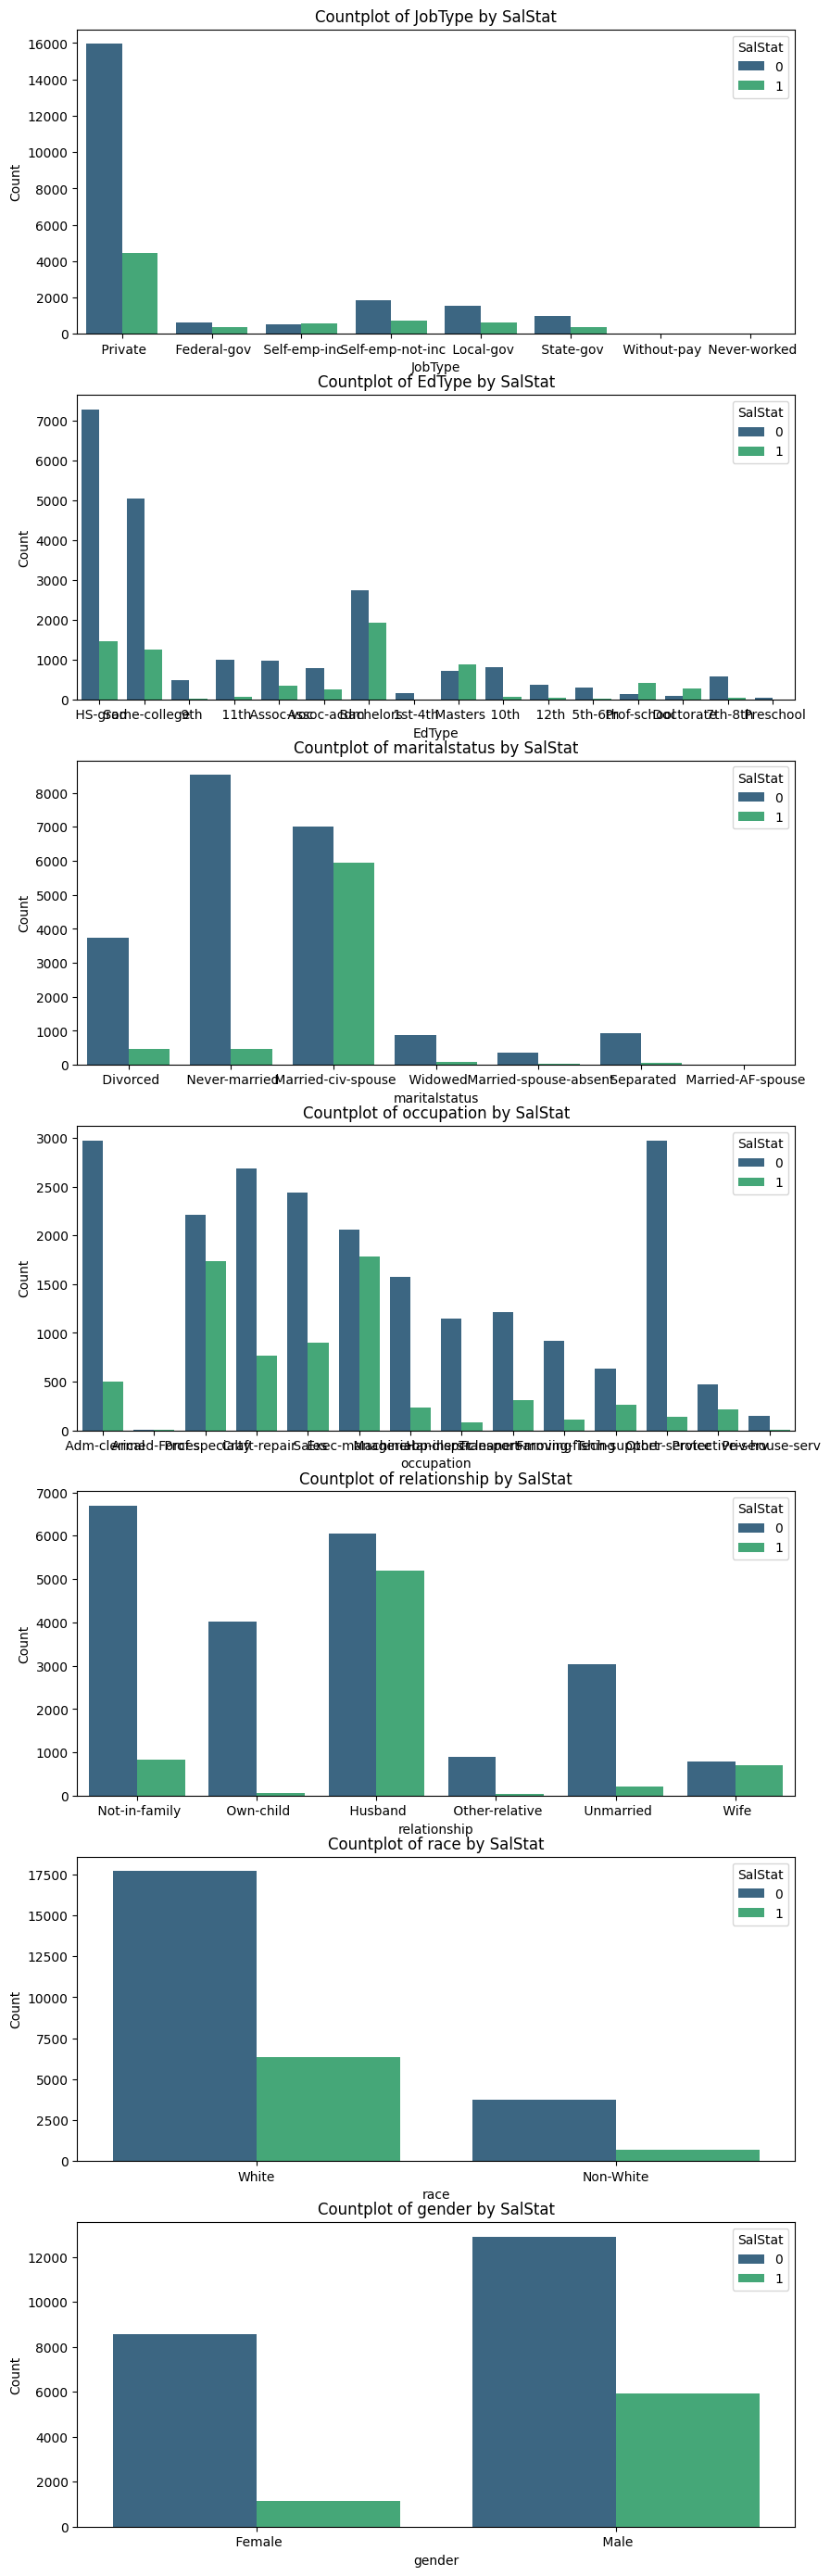

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with categorical columns and 'SalStat'
# Replace 'categorical_columns' with the actual list of categorical columns in your DataFrame
categorical_columns = con_data

# Create subplots based on the number of categorical columns
num_subplots = len(categorical_columns) - 1  # Exclude 'SalStat' from subplots
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(10, 5 * num_subplots))

# Iterate through categorical columns and create bar plots
for i, column in enumerate(categorical_columns):  # Exclude 'SalStat'
    sns.countplot(x=column, hue='SalStat', data=inc, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Countplot of {column} by SalStat')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='SalStat', loc='upper right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8012857977790766
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      6448
           1       0.61      0.54      0.57      2107

    accuracy                           0.80      8555
   macro avg       0.73      0.71      0.72      8555
weighted avg       0.79      0.80      0.80      8555



In [ ]:
# Create a Random Forest Classifier after hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42, n_estimators = 100, min_samples_split = 50, max_features = 'log2', max_depth = 20)

# Train the Random Forest on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.831092928112215
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6448
           1       0.71      0.53      0.61      2107

    accuracy                           0.83      8555
   macro avg       0.78      0.73      0.75      8555
weighted avg       0.82      0.83      0.82      8555



In [ ]:
from sklearn.metrics import confusion_matrix
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Display the confusion matrix DataFrame
print("Confusion Matrix:")
print(conf_df)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         5998          450
Actual 1          995         1112


<ipython-input-148-3f786dbc8f58>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




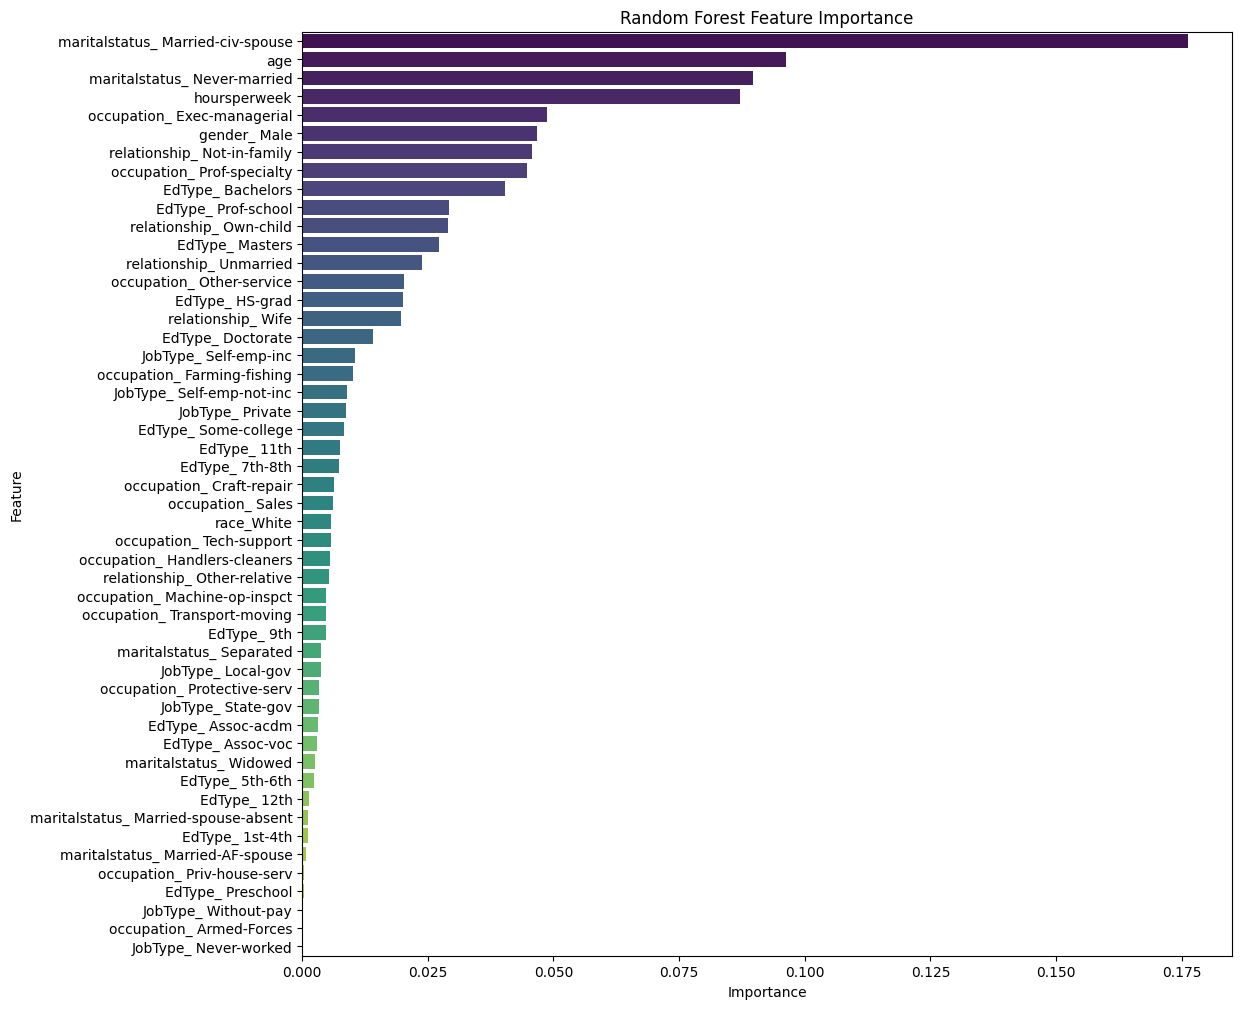

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()